In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [155]:
df = pd.read_csv("G:/New 20121 Dekstop Files/thesis 2021/employee attrition dataset/employee_attrition.csv")
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1406,54,No,Travel_Rarely,157,Research & Development,10,3,Medical,1,1980,...,4,80,0,9,3,3,5,2,1,4
451,42,No,Travel_Rarely,319,Research & Development,24,3,Medical,1,605,...,4,80,1,10,5,2,10,9,5,8
1003,25,No,Travel_Rarely,949,Research & Development,1,3,Technical Degree,1,1415,...,2,80,1,7,2,2,3,2,0,2


In [156]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [157]:
df.OverTime.values

array(['Yes', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [158]:
df.Over18.values

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'Y'], dtype=object)

In [159]:
for i in df.columns:
    print("{}".format(df[i]),df[i].values)

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64 [41 49 37 ... 27 49 34]
0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object ['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object ['Travel_Rarely' 'Travel_Frequently' 'Travel_Rarely' ... 'Travel_Rarely'
 'Travel_Frequently' 'Travel_Rarely']
0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyR

# Data Visualization

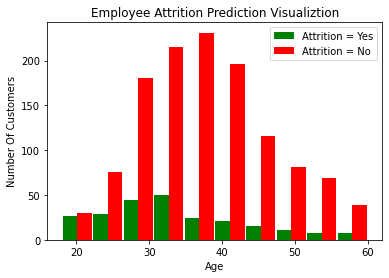

In [160]:
age_attrition_no = df[df.Attrition=='No'].Age
age_attrition_yes = df[df.Attrition=='Yes'].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Employee Attrition Prediction Visualiztion")


plt.hist([age_attrition_yes, age_attrition_no], rwidth=0.95, color=['green','red'],label=['Attrition = Yes','Attrition = No'])
plt.legend()

In [161]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [162]:
print_unique_col_values(df)

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [163]:
df.Attrition.replace({'Yes': 1,'No': 0},inplace=True)
df.OverTime.replace({'Yes': 1,'No': 0},inplace=True)
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [164]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [165]:
print_unique_col_values(df)

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']


In [166]:
df.drop('Over18', axis='columns', inplace=True)

In [167]:
print_unique_col_values(df)

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']


# One hot encoding for categorical columns

In [168]:
df = pd.get_dummies(data=df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'J

In [169]:
df.sample(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
695,37,1,625,1,4,1,970,1,0,46,...,0,0,0,0,0,1,0,0,1,0
677,49,0,527,8,2,1,944,1,1,51,...,1,0,0,0,0,0,0,0,1,0
388,42,0,201,1,4,1,517,2,1,95,...,1,0,0,0,0,0,0,1,0,0
423,30,0,1398,22,4,1,567,3,1,69,...,0,0,0,0,0,1,0,0,1,0
250,37,1,504,10,3,1,342,1,0,61,...,0,0,1,0,0,0,0,1,0,0


In [170]:
df.drop('EmployeeNumber', axis='columns', inplace=True)
df.drop('EmployeeCount', axis='columns', inplace=True)

In [171]:
df.head(6)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,1,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,0,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,0,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,1,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,0,40,3,1,...,1,0,0,0,0,0,0,0,1,0
5,32,0,1005,2,2,4,0,79,3,1,...,1,0,0,0,0,0,0,0,0,1


In [172]:
cols_to_scale = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [173]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age: [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition: [1 0]
DailyRate: [7.15819613e-01 1.26700072e-01 9.09806729e-01 9.23407301e-01
 3.50035791e-01 6.46385111e-01 8.74731568e-01 8.99069435e-01
 8.16034359e-02 8.56836077e-01 5.06084467e-01 3.65068003e-02
 4.06585540e-01 8.90479599e-01 7.15819613e-04 9.21259843e-01
 1.66070150e-01 7.30851825e-01 7.99570508e-01 1.92555476e-01
 4.08732999e-01 7.98854689e-01 2.26914817e-01 2.06871868e-01
 4.27344309e-01 8.44667144e-01 7.32283465e-01 4.21617752e-01
 2.68432355e-01 4.31639227e-01 5.88403722e-01 9.71367215e-01
 1.6463

# Train Test Split

In [174]:
X = df.drop('Attrition',axis='columns')
y = df['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [175]:
X_train.shape

(1176, 50)

In [176]:
X_test.shape

(294, 50)

In [177]:
len(X_train.columns)

50

# Build a model (ANN) in tensorflow/keras

In [178]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(50,), activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
37/37 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.8129
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8401
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8401
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8410
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8503
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8622
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8759
Epoch 8/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8835
Epoch 9/150
37/37 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8878
Epoch 10/150
37/37 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8963
Epoch 11/

37/37 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 84/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 85/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 86/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 87/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 88/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 89/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 90/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 91/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 92/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 93/150


In [179]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.3962 - accuracy: 0.8435


[1.3961759805679321, 0.8435373902320862]

In [180]:
yp = model.predict(X_test)
yp[:5]

array([[3.9312005e-02],
       [3.3616670e-05],
       [6.7795263e-09],
       [1.4284253e-04],
       [7.8948824e-07]], dtype=float32)

In [181]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [182]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [183]:
y_test[:10]

1000    0
236     1
202     0
1100    0
117     0
985     1
762     1
533     0
1147    0
1438    1
Name: Attrition, dtype: int64

In [184]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       245
           1       0.54      0.39      0.45        49

    accuracy                           0.84       294
   macro avg       0.71      0.66      0.68       294
weighted avg       0.83      0.84      0.83       294



Text(33.0, 0.5, 'Truth')

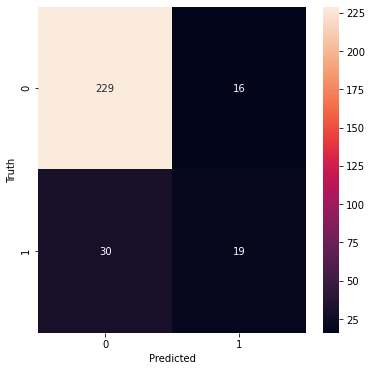

In [187]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (6,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [190]:
# Class count
count_class_0, count_class_1 = df.Attrition.value_counts()

# Divide by class
df_class_0 = df[df['Attrition'] == 0]
df_class_1 = df[df['Attrition'] == 1]

In [195]:
count_class_0, count_class_1

(1233, 237)